In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [15]:
df = pd.read_csv("data/jobs_in_data.csv")

canada = df[df["employee_residence"] == "Canada"]
us = df[df["employee_residence"] == "United States"]
uk = df[df["employee_residence"] == "United Kingdom"]
# df = df.astype({'salary_in_usd':'int'})
# df.dropna
df

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


In [ ]:
# corr = df.corr(numeric_only=False)
# corr

In [3]:
def order(salary_group):
    # salary_group = df.groupby(["experience_level", "work_setting"])
    # Get the groups manually by experience level
    junior_group = salary_group.get_group('Entry-level')
    mid_level_group = salary_group.get_group('Mid-Level')
    senior_group = salary_group.get_group('Senior')
    exec_group = salary_group.get_group('Executive')

    # Concatenate the groups in the desired order
    ordered_group = pd.concat([junior_group, mid_level_group, senior_group, exec_group])
    return ordered_group

In [4]:
# exp = df[["experience_level", "work_setting"]].value_counts()
# exp = df[["experience_level", "work_setting"]]["salary_in_usd"].mean()
# print(exp)
# can't directly perform something like mean() on the this dataframe, have to use groupby()

pd.set_option('display.max_columns', None)
# print(job_type)

# tried to order the items by one of the categories, works for groupby object but not a dataframe?

# order_mapping = {"Entry-level": 0, "Mid-level": 1, "Senior": 2, "Executive": 3}
# salary_group = df.sort_values("experience_level", key=lambda x: x.map(order_mapping))
order_mapping = ["Entry-level", "Mid-level", "Senior", "Executive"]
# df = df.reindex(order_mapping, level = 7)
# df['experience_level'] = df['experience_level'].map(order_mapping)
salary_group = df.groupby(["experience_level", "work_setting"]) #.apply(lambda x: x.sort_values(by='experience_level'))
# salary_group = salary_group.swaplevel().sort_index()
# salary_group = salary_group.apply(lambda x: x.reindex(order_mapping))
# salary_group = salary_group.reset_index(level = 0)
# salary_group = salary_group.reindex(order_mapping, level=0)
# salary_group = order(salary_group)
print(salary_group["salary_in_usd"])
print(salary_group["salary_in_usd"].median())

unique_combo =  list(salary_group.groups.keys())
# setting = df["work_setting"].unique()
# print(setting)
# print(len(unique_combo))

# creating a new column that combines the 2 categories, don't really like this approach

# df["combined"] = df['experience_level'] + ', ' + df['work_setting']
# print(df["combined"])

experience_level  work_setting
Entry-level       Hybrid           55000.0
                  In-person        93000.0
                  Remote           69512.5
Executive         Hybrid          130873.5
                  In-person       177550.0
                  Remote          205785.0
Mid-level         Hybrid           70139.0
                  In-person       116480.0
                  Remote          100000.0
Senior            Hybrid           96282.0
                  In-person       156100.0
                  Remote          153900.0
Name: salary_in_usd, dtype: float64


#### Plotting them as is to see some distribution

Text(0.5, 0, 'Salary(USD)')

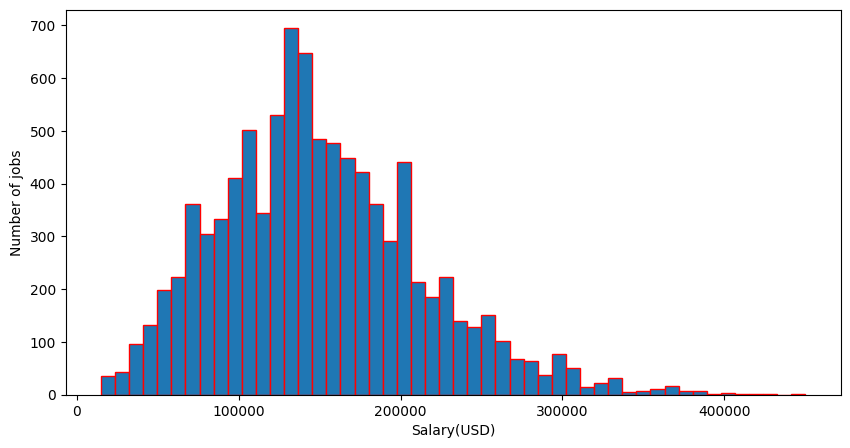

In [5]:

fig, ax = plt.subplots(figsize=(10,5)) 
number_of_bins = 50
salary = df["salary_in_usd"]
h = ax.hist(salary, bins=number_of_bins, edgecolor = "red")
ax.set_ylabel("Number of jobs")
ax.set_xlabel("Salary(USD)")
# ax.set_yscale("log")

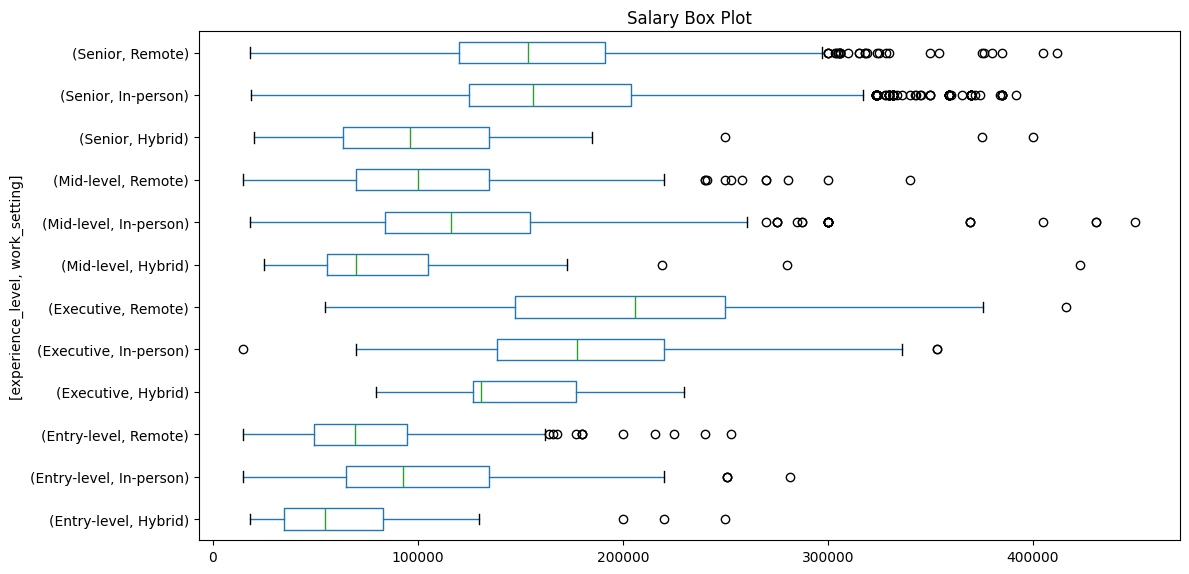

In [6]:
df.boxplot(column="salary_in_usd", by=["experience_level", "work_setting"], figsize=(12,6), grid=False, vert = False)
plt.suptitle("")
plt.title("Salary Box Plot")
plt.tight_layout()
# plt.show()

#### Assign colours based on unique combinations

In [7]:
from matplotlib import colormaps
colors = colormaps['viridis']

color_list = [colors(i) for i in np.linspace(0,1,len(unique_combo))]

color_dict = {str(unique_combo[i]):color_list[i] for i in range(len(unique_combo))}
print(color_dict)

# order_mapping = {"Entry-level": 1, "Mid-level": 2, "Senior": 3, "Executive": 4}
# # sorted_combo = sorted(unique_combo, key=lambda x: order_mapping[x[0]])
# # key_function = lambda x: (order_mapping[x[0]], order_mapping[x[1]])
# # sorted_salary = salary_group.sort_values(by="experience_level", key=lambda x: x.map(order_mapping))
# def custom_sort_key(index):
#     return tuple(order_mapping[level] for level in index)

# sorted_grouped = salary_group.apply(lambda x: x.sort_values(by=["experience_level"], key=custom_sort_key))

# print(sorted_grouped)

{"('Entry-level', 'Hybrid')": (0.267004, 0.004874, 0.329415, 1.0), "('Entry-level', 'In-person')": (0.283072, 0.130895, 0.449241, 1.0), "('Entry-level', 'Remote')": (0.262138, 0.242286, 0.520837, 1.0), "('Executive', 'Hybrid')": (0.220057, 0.343307, 0.549413, 1.0), "('Executive', 'In-person')": (0.177423, 0.437527, 0.557565, 1.0), "('Executive', 'Remote')": (0.143343, 0.522773, 0.556295, 1.0), "('Mid-level', 'Hybrid')": (0.119512, 0.607464, 0.540218, 1.0), "('Mid-level', 'In-person')": (0.166383, 0.690856, 0.496502, 1.0), "('Mid-level', 'Remote')": (0.319809, 0.770914, 0.411152, 1.0), "('Senior', 'Hybrid')": (0.525776, 0.833491, 0.288127, 1.0), "('Senior', 'In-person')": (0.762373, 0.876424, 0.137064, 1.0), "('Senior', 'Remote')": (0.993248, 0.906157, 0.143936, 1.0)}


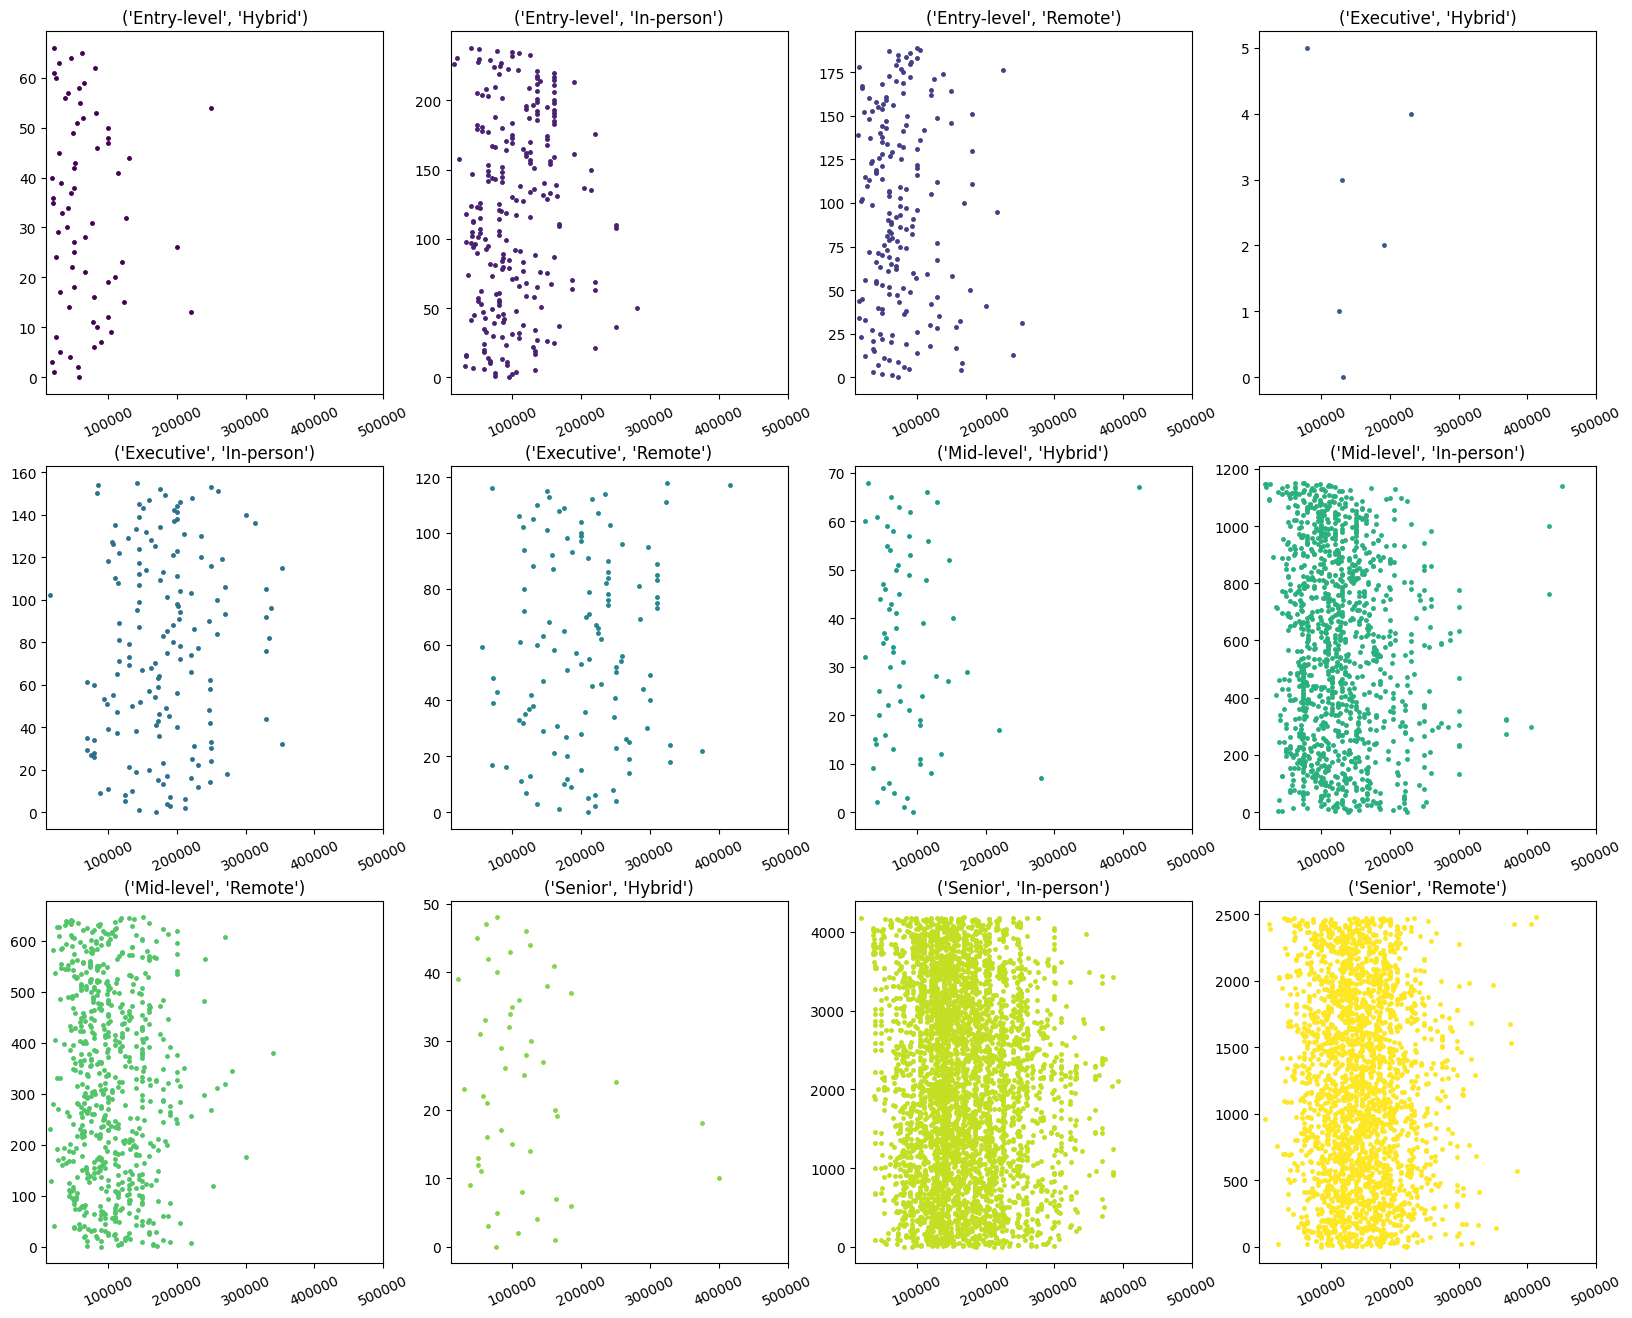

In [8]:
rows = 3
cols = 4
fig, ax = plt.subplots(rows, cols, figsize=(20,16))

for num, i in enumerate(unique_combo):
    temp_salary = df[(df["experience_level"]== i[0]) & (df["work_setting"] == i[1])]["salary_in_usd"].values
    col = num%cols
    row = int(np.floor(num/cols))
    axis = ax[row,col]
    axis.plot(temp_salary,np.arange(len(temp_salary)), "o", color=color_list[num], ms = 2.5)
    axis.set_title(i)
    axis.tick_params(axis='x', labelrotation=25)
    # axis.set_xticklabels(axis.get_xticks(), ha = "right")
    axis.set_xlim((10000,500000))
    # not setting a boundary on y axis because there are too many more entries for senior positions
    # axis.set_ylim((0, 4500))

#### Central Tendency
##### Mean


Text(0.5, 1.0, 'Salary mean')

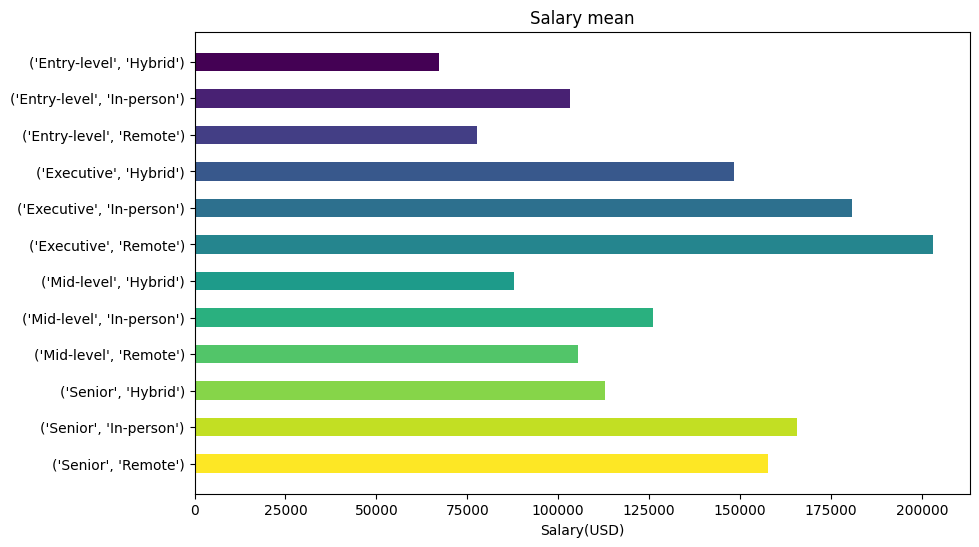

In [9]:
fig1, ax1 = plt.subplots(figsize=(10,6)) 
combo_label = [f"{i[0], i[1]}" for i in unique_combo]
mean_sal = salary_group["salary_in_usd"].mean()
ax1.barh(combo_label, mean_sal ,0.5,color=color_list)
ax1.set_xlabel("Salary(USD)")

# inverted so they are arranged from top to bottom
ax1.invert_yaxis()
ax1.set_title("Salary mean")
# ax1.tick_params(axis='x', labelrotation=90)

##### Range

In [10]:
def range(x):
    return x.max() - x.min()

# salary_range = salary_group.apply(range).sort_values()

# reset index here is necessary because of the new column has no name
# really not sure why reset_index() assigns a 0 to the salary despite the range() method calls for the salary column, but hey it works
# even weirder is that its not a string "0", but literally the number 0?
# apparently this can be fixed by calling salary_group["salary_in_usd"].apply, rather than salary_group.apply()
salary_range = salary_group["salary_in_usd"].apply(range).reset_index()#.sort_values(by="salary_in_usd")
# salary_test = salary_group.apply(range)
# print(salary_test)
# combined_group = df.groupby(["combined"])
# salary_range = combined_group.apply(range)
# print(salary_range)

[Text(0, 0, "('Entry-level', 'Hybrid')"),
 Text(1, 0, "('Entry-level', 'In-person')"),
 Text(2, 0, "('Entry-level', 'Remote')"),
 Text(3, 0, "('Executive', 'Hybrid')"),
 Text(4, 0, "('Executive', 'In-person')"),
 Text(5, 0, "('Executive', 'Remote')"),
 Text(6, 0, "('Mid-level', 'Hybrid')"),
 Text(7, 0, "('Mid-level', 'In-person')"),
 Text(8, 0, "('Mid-level', 'Remote')"),
 Text(9, 0, "('Senior', 'Hybrid')"),
 Text(10, 0, "('Senior', 'In-person')"),
 Text(11, 0, "('Senior', 'Remote')")]

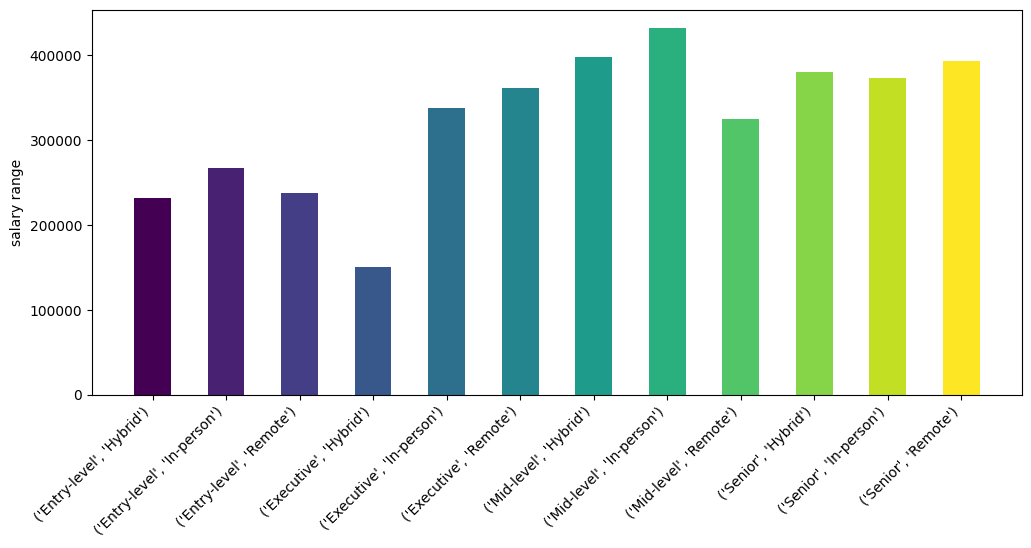

In [11]:
# print(salary_group["salary_in_usd"])

fig, ax = plt.subplots(figsize=(12,5))
ax.set_ylabel("salary range")

# using combo_label directly as x axis means I can't change the horizontal alightment

ax.bar(salary_range.index, salary_range["salary_in_usd"], 0.5, color =color_list)
# ax.tick_params(axis='x', labelrotation=35)
ax.set_xticks(salary_range.index)
ax.set_xticklabels(unique_combo, rotation=45, ha='right')

In [12]:
test = df["salary_in_usd"].dtype
print(test)

int64


#### Standard Deviation

experience_level  work_setting
Entry-level       Hybrid          45900.733583
                  In-person       48831.108547
                  Remote          44964.385605
Executive         Hybrid          53633.387753
                  In-person       64991.170960
                  Remote          72022.764429
Mid-level         Hybrid          59930.360241
                  In-person       57248.957787
                  Remote          47935.724595
Senior            Hybrid          74016.200322
                  In-person       62255.804121
                  Remote          53458.652086
Name: salary_in_usd, dtype: float64
   experience_level work_setting  salary_in_usd
0       Entry-level       Hybrid   45900.733583
1       Entry-level    In-person   48831.108547
2       Entry-level       Remote   44964.385605
3         Executive       Hybrid   53633.387753
4         Executive    In-person   64991.170960
5         Executive       Remote   72022.764429
6         Mid-level       Hybrid 

[Text(0, 0, "('Entry-level', 'Hybrid')"),
 Text(1, 0, "('Entry-level', 'In-person')"),
 Text(2, 0, "('Entry-level', 'Remote')"),
 Text(3, 0, "('Executive', 'Hybrid')"),
 Text(4, 0, "('Executive', 'In-person')"),
 Text(5, 0, "('Executive', 'Remote')"),
 Text(6, 0, "('Mid-level', 'Hybrid')"),
 Text(7, 0, "('Mid-level', 'In-person')"),
 Text(8, 0, "('Mid-level', 'Remote')"),
 Text(9, 0, "('Senior', 'Hybrid')"),
 Text(10, 0, "('Senior', 'In-person')"),
 Text(11, 0, "('Senior', 'Remote')")]

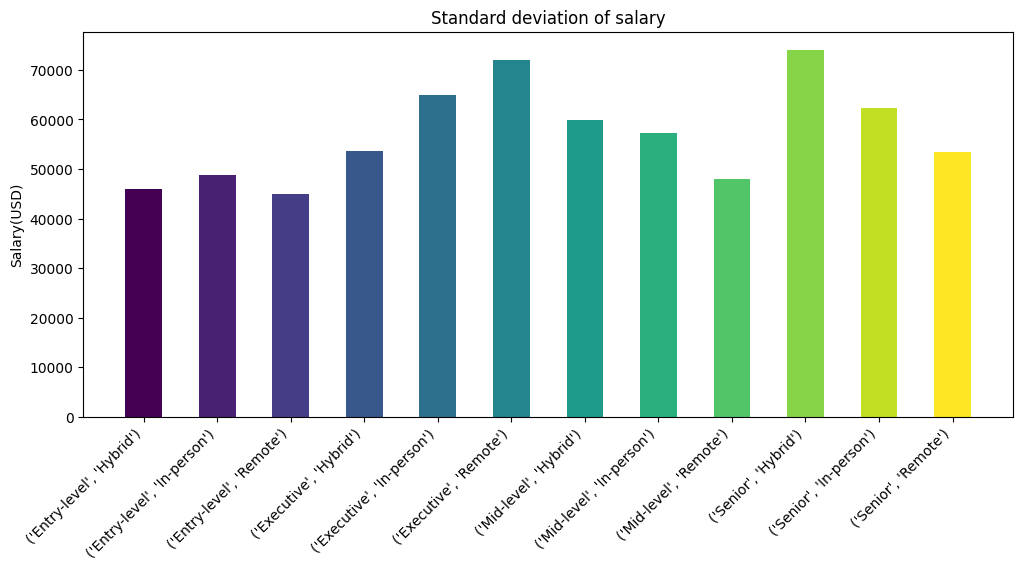

In [13]:
std_salary = salary_group["salary_in_usd"].std()
print(std_salary)
std_salary = std_salary.reset_index()
print(std_salary)

fig, ax = plt.subplots(figsize=(12,5))
ax.set_ylabel("Salary(USD)")
ax.set_title("Standard deviation of salary")


ax.bar(std_salary.index, std_salary["salary_in_usd"], 0.5, color = color_list)
ax.set_xticks(salary_range.index)
ax.set_xticklabels(unique_combo, rotation=45, ha='right')

#### Z-Score

In [36]:
def calc_z(x):
    return (x - x.mean()) / x.std()

     experience_level work_setting  level_2  salary_in_usd
0         Entry-level       Hybrid      609      -0.218030
1         Entry-level       Hybrid      956      -0.994271
2         Entry-level       Hybrid     1360      -0.233782
3         Entry-level       Hybrid     1945      -1.072548
4         Entry-level       Hybrid     2289      -0.489703
...               ...          ...      ...            ...
9350           Senior       Remote     9336       1.445826
9351           Senior       Remote     9341       0.607795
9352           Senior       Remote     9345      -2.096762
9353           Senior       Remote     9350       0.136403
9354           Senior       Remote     9351       4.756796

[9355 rows x 4 columns]


Text(0.5, 1.0, 'Z-score')

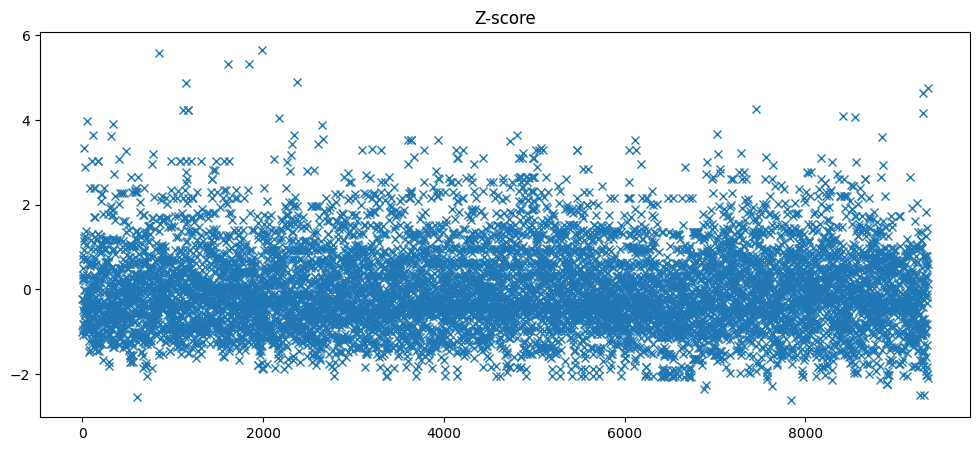

In [37]:

z_score = salary_group["salary_in_usd"].apply(calc_z).reset_index()
# z_score = z_score.reset_index()
print(z_score)

fig, ax = plt.subplots(figsize = (12,5))
ax.plot(z_score["salary_in_usd"], "x")
ax.set_title("Z-score")


[['Entry-level' 'Hybrid' 5607.667117391762]
 ['Entry-level' 'In-person' 3158.621834112134]
 ['Entry-level' 'Remote' 3262.059385703503]
 ['Executive' 'Hybrid' 21895.73886208608]
 ['Executive' 'In-person' 5203.45810974606]
 ['Executive' 'Remote' 6602.315990347924]
 ['Mid-level' 'Hybrid' 7214.767543331321]
 ['Mid-level' 'In-person' 1685.9819901637868]
 ['Mid-level' 'Remote' 1884.5477945970915]
 ['Senior' 'Hybrid' 10573.742903134516]
 ['Senior' 'In-person' 962.6930417157103]
 ['Senior' 'Remote' 1073.9086813558858]]


[Text(0, 0, "('Entry-level', 'Hybrid')"),
 Text(1, 0, "('Entry-level', 'In-person')"),
 Text(2, 0, "('Entry-level', 'Remote')"),
 Text(3, 0, "('Executive', 'Hybrid')"),
 Text(4, 0, "('Executive', 'In-person')"),
 Text(5, 0, "('Executive', 'Remote')"),
 Text(6, 0, "('Mid-level', 'Hybrid')"),
 Text(7, 0, "('Mid-level', 'In-person')"),
 Text(8, 0, "('Mid-level', 'Remote')"),
 Text(9, 0, "('Senior', 'Hybrid')"),
 Text(10, 0, "('Senior', 'In-person')"),
 Text(11, 0, "('Senior', 'Remote')")]

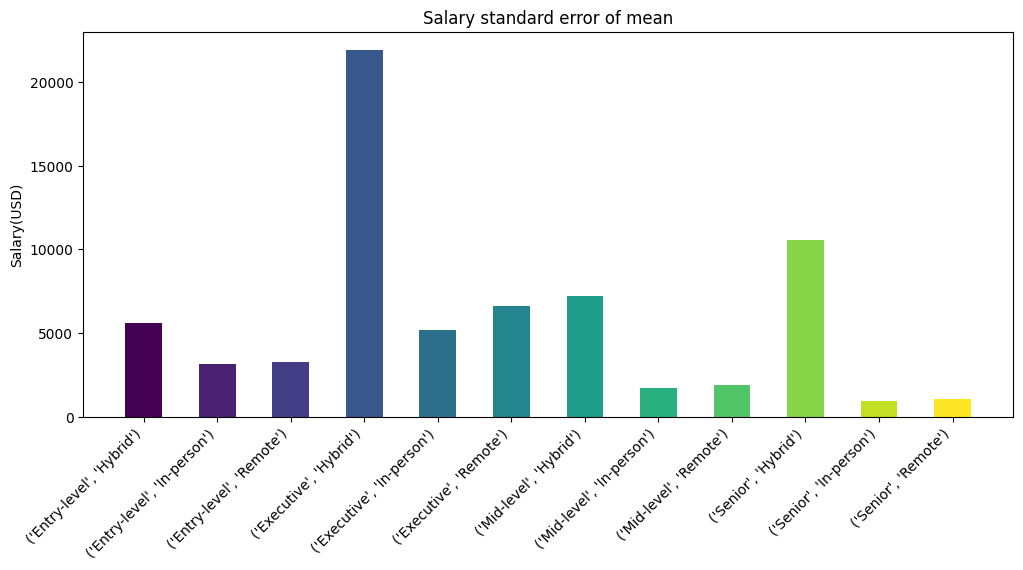

In [40]:
# grouped = df.groupby("label")
sem_salary = salary_group["salary_in_usd"].sem().reset_index()
# print(sem_salary)

fig, ax = plt.subplots(figsize=(12,5))
ax.set_ylabel("Salary(USD)")
ax.set_title("Salary standard error of mean")
print(sem_salary.values)
ax.bar(sem_salary.index, sem_salary["salary_in_usd"], 0.5, color = color_list)
ax.set_xticks(salary_range.index)
ax.set_xticklabels(unique_combo, rotation=45, ha='right')